In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

### Preprocessing dataset

In [2]:
# df.dtypes

In [3]:
df

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05.0000000,NEWS2,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46.0000000,NEWS2,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14.0000000,NEWS2,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20.0000000,NEWS2,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0


In [4]:
# print(df.LOC.unique())
# print(df.EwsProcedure.unique())
# print(df.Add_O2.unique())

In [5]:
# https://journals.lww.com/nursing/Citation/2008/08000/Documenting_level_of_consciousness.53.aspx#:~:text=The%20scale%20measures%20three%20subscales,of%203%20indicates%20deep%20coma.
# how do you score LOC?
df['Add_O2'] = df['Add_O2'].replace(['True', 'False'], [1, 0], inplace=True)
df['LOC'] = df['LOC'].replace(['ALERT','NEW_CONFUSION','PAIN','UNRESPONSIVE','VOICE'],[0,1,2,3,4], inplace=True)
df = df.fillna(0)

In [6]:
df['ObservationDate'] = df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Year'] = pd.DatetimeIndex(df['ObservationDate']).year
df['Month'] = pd.DatetimeIndex(df['ObservationDate']).month
df['Day'] = pd.DatetimeIndex(df['ObservationDate']).day
df['Time'] = pd.DatetimeIndex(df['ObservationDate']).time
df = df.drop(['EwsProcedure', 'ObservationDate'], axis=1)

In [7]:
patient_value_counts = df.PatientId.value_counts().sort_values(ascending=False)

# how many percent of patients has only 1 observation? What is the correlation matrix for people with 
# more observations in the dataset?

print(patient_value_counts)
print(df.PatientId.nunique())

1743    643
5797    441
1261    441
630     356
1841    351
       ... 
7992      1
3232      1
929       1
7776      1
2047      1
Name: PatientId, Length: 10136, dtype: int64
10136


In [8]:
df.head()

,PatientId,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score,Year,Month,Day,Time
0,29,0,143.0,0.0,0,0,96.0,0.0,0,0.0,80,0,18,0,36.6,0,2019,5,1,13:27:50
1,30,3,0.0,0.0,0,0,94.0,1.0,0,0.0,83,0,16,0,36.5,0,2019,5,1,15:27:44
2,31,1,117.0,0.0,0,0,95.0,1.0,0,0.0,75,0,14,0,37.3,0,2019,5,1,15:54:27
3,32,0,0.0,0.0,0,0,98.0,0.0,0,0.0,85,0,19,0,37.2,0,2019,5,1,16:07:27
4,33,0,135.0,0.0,0,0,97.0,0.0,0,0.0,89,0,14,0,36.1,0,2019,5,1,17:03:16


In [9]:
print(df.TEMP.max())
print(df.TEMP.min())

50.0
3.0


In [10]:
#Saving outliers with low temperature to 'outliers_temp' and the rest to 'df'
normal_temp = df[df['TEMP'].between(36, 38)]
outliers_temp = df[df['TEMP'].between(36, 38)]
outliers_temp_patients_counts = outliers_temp['PatientId'].value_counts().sort_values(ascending=False)
outliers_temp_counts = outliers_temp['TEMP'].value_counts().sort_values(ascending=False) #ID maybe more than once per temperature

print(outliers_temp_patients_counts)
print(outliers_temp_counts)
print(outliers_temp[['PatientId','TEMP']])

df_normal_temp = df[~(df['TEMP'] <= 35.5)]  

#write algo that tests if correlations go higher if we exclude or include people with higher or lower temperature

1743    637
5797    429
1261    424
1841    349
630     340
       ... 
9987      1
1640      1
3943      1
9954      1
2047      1
Name: PatientId, Length: 9841, dtype: int64
36.5    17494
36.4    15671
36.6    15013
36.8    13419
36.7    13052
36.2    12231
36.3    11211
36.9    10409
37.0     9916
36.1     9847
37.1     7604
37.2     6141
36.0     5849
37.3     4449
37.4     3413
37.5     2707
37.6     1777
37.7     1290
37.8      947
37.9      645
38.0      408
Name: TEMP, dtype: int64
        PatientId  TEMP
0              29  36.6
1              30  36.5
2              31  37.3
3              32  37.2
4              33  36.1
...           ...   ...
171730      20480  36.8
171731      20278  36.1
171732      20480  36.8
171733       2499  36.2
171734      20527  36.5

[163493 rows x 2 columns]


### Checking correlations

Text(0.5, 1.0, 'Correlation Heatmap')

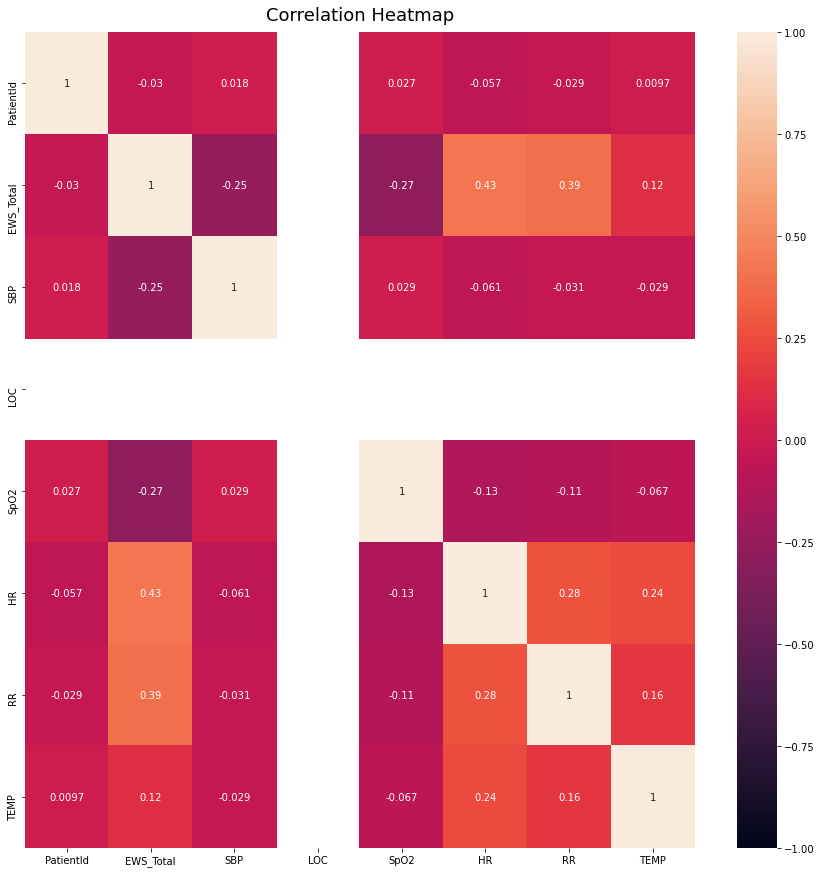

In [11]:
from scipy.stats.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

df_ex_scores = df[['PatientId','EWS_Total','SBP','LOC','SpO2','HR','RR','TEMP']]


plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_ex_scores.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)